In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **1. Un proyecto involucra tres tareas. La tarea 1 puede tomar tres dias (70% probabilidad), pero tambien podría tomar dos dias (10% probabilidad) o cuatro dias (20% probabilidad). La tarea 2 puede tomar seis dias (60% probabilidad), y 20% de probabilidad de tomar sea cinco u ocho dias. La tarea 3 tiene 80% de probabilidad de completarse en cuatro dias, 5% de probabilidad de completarse en tres dias, y 15% probabilidad de completarse cinco dias. Si las tareas se deben ejecutar en secuencia, entregar información respecto al tiempo de finalización del proyecto. Si las tareas 2 y 3 deben ejecutarse en paralelo, entregar información respecto al tiempo de finalización del proyecto. Si se conoce que existen interrupciones en el sistema de soporte, creando tiempos de retraso que siguen una distribucion de Poisson con parametro 2, los tiempos de retraso se pueden dar con un 30% de probabilidad entregar información respecto al tiempo de finalización del proyecto.**

In [42]:
def duracion_tarea_1():
  number = np.random.uniform()
  if number < 0.7: return 3
  if number < 0.8: return 2
  return 4

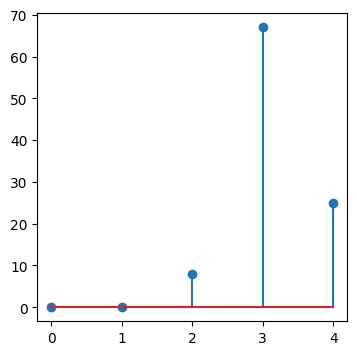

In [43]:
n_simulations = 100
simulations = np.zeros(n_simulations, dtype=int)
for i in range(n_simulations):
  simulations[i] = duracion_tarea_1()
plt.figure(figsize=(4, 4))
plt.stem(np.bincount(simulations))
plt.show()

In [44]:
def duracion_tarea_2():
  number = np.random.uniform()
  if number < 0.6: return 6
  if number < 0.8: return 5
  return 8

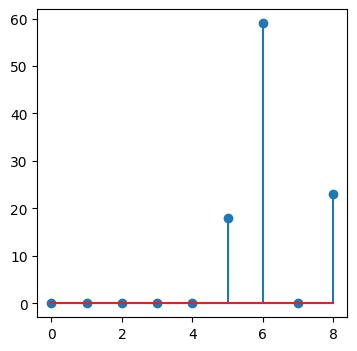

In [45]:
n_simulations = 100
simulations = np.zeros(n_simulations, dtype=int)
for i in range(n_simulations):
  simulations[i] = duracion_tarea_2()
plt.figure(figsize=(4, 4))
plt.stem(np.bincount(simulations))
plt.show()

In [46]:
def duracion_tarea_3():
  number = np.random.uniform()
  if number < 0.8: return 4
  if number < 0.85: return 3
  return 5

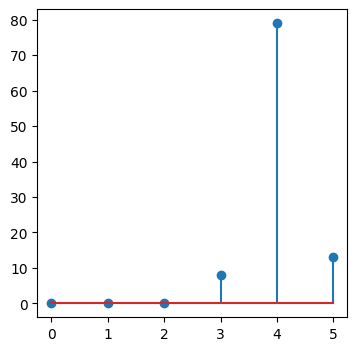

In [47]:
n_simulations = 100
simulations = np.zeros(n_simulations, dtype=int)
for i in range(n_simulations):
  simulations[i] = duracion_tarea_3()
plt.figure(figsize=(4, 4))
plt.stem(np.bincount(simulations))
plt.show()

In [48]:
# las tareas se ejecutan en secuencia
# la duración del proyecto es la suma de las duraciones de las tareas
def duracion_proyecto():
  return duracion_tarea_1() + duracion_tarea_2() + duracion_tarea_3()





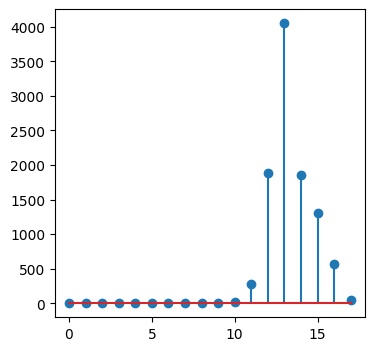

Peor escenario: 17
Mejor escenario: 10
Media: 13.3861


In [49]:
n_simulations = 10000
simulations = np.zeros(n_simulations, dtype=int)
for i in range(n_simulations):
  simulations[i] = duracion_proyecto()
plt.figure(figsize=(4, 4))
plt.stem(np.bincount(simulations))
plt.show()
print(f'Peor escenario: {np.max(simulations)}')
print(f'Mejor escenario: {np.min(simulations)}')
# media
print(f'Media: {np.mean(simulations)}')

In [50]:
# tarea 2 y 3 se ejecutan en paralelo
def duracion_proyecto():
  return duracion_tarea_1() + max(duracion_tarea_2(), duracion_tarea_3())


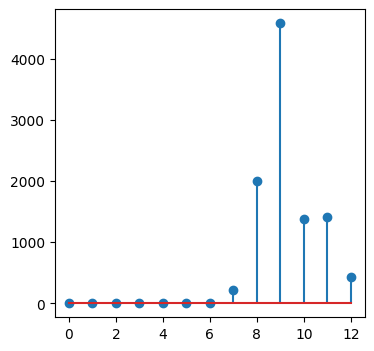

Peor escenario: 12
Mejor escenario: 7
Media: 9.305


In [51]:
n_simulations = 10000
simulations = np.zeros(n_simulations, dtype=int)
for i in range(n_simulations):
  simulations[i] = duracion_proyecto()
plt.figure(figsize=(4, 4))
plt.stem(np.bincount(simulations))
plt.show()
print(f'Peor escenario: {np.max(simulations)}')
print(f'Mejor escenario: {np.min(simulations)}')
# media
print(f'Media: {np.mean(simulations)}')

In [52]:
# incluyendo tiempos de retraso que siguen distribución de Poisson
def duracion_proyecto():
  retraso = 0
  if np.random.uniform() < 0.3:
    retraso = np.random.poisson(lam=0.5)
  return duracion_tarea_1() + duracion_tarea_2() + duracion_tarea_3() + retraso

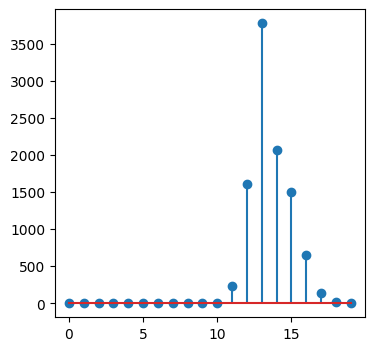

Peor escenario: 19
Mejor escenario: 10
Media: 13.5581


In [53]:
n_simulations = 10000
simulations = np.zeros(n_simulations, dtype=int)
for i in range(n_simulations):
  simulations[i] = duracion_proyecto()
plt.figure(figsize=(4, 4))
plt.stem(np.bincount(simulations))
plt.show()
print(f'Peor escenario: {np.max(simulations)}')
print(f'Mejor escenario: {np.min(simulations)}')
# media
print(f'Media: {np.mean(simulations)}')


In [54]:
# ejemplo procesos 
def duracion_proceso_1():
    return np.random.normal(promedio, desviacion_estandar)

### **2. Predecir los precios de stocks Apple Inc. (AAPL) para los dos últimos meses del 2023. Utilizar los precios entre enero 2010 a octubre 2023 como data de entrenamiento**

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [56]:
# definir variables dataset
stock_name = 'AAPL'
start_date = '2010-01-01'
end_date = '2023-10-31'
pred_end_date = '2023-12-31'

In [57]:
# cargar datos desde Yahoo Finance
data = yf.download(stock_name, start=start_date, end=pred_end_date)

[*********************100%%**********************]  1 of 1 completed


In [58]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386966,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800


In [59]:
prices = data['Adj Close']
prices

Date
2010-01-04      6.478998
2010-01-05      6.490200
2010-01-06      6.386966
2010-01-07      6.375157
2010-01-08      6.417542
                 ...    
2023-12-22    193.600006
2023-12-26    193.050003
2023-12-27    193.149994
2023-12-28    193.580002
2023-12-29    192.529999
Name: Adj Close, Length: 3522, dtype: float64

In [60]:
# preparar datos de entrenamiento y prueba
train_set = prices.loc[:end_date]
test_set = prices.loc[end_date:pred_end_date]

In [61]:
test_set

Date
2023-10-31    170.545319
2023-11-01    173.741104
2023-11-02    177.336380
2023-11-03    176.417572
2023-11-06    178.994186
2023-11-07    181.580780
2023-11-08    182.649368
2023-11-09    182.169998
2023-11-10    186.399994
2023-11-13    184.800003
2023-11-14    187.440002
2023-11-15    188.009995
2023-11-16    189.710007
2023-11-17    189.690002
2023-11-20    191.449997
2023-11-21    190.639999
2023-11-22    191.309998
2023-11-24    189.970001
2023-11-27    189.789993
2023-11-28    190.399994
2023-11-29    189.369995
2023-11-30    189.949997
2023-12-01    191.240005
2023-12-04    189.429993
2023-12-05    193.419998
2023-12-06    192.320007
2023-12-07    194.270004
2023-12-08    195.710007
2023-12-11    193.179993
2023-12-12    194.710007
2023-12-13    197.960007
2023-12-14    198.110001
2023-12-15    197.570007
2023-12-18    195.889999
2023-12-19    196.940002
2023-12-20    194.830002
2023-12-21    194.679993
2023-12-22    193.600006
2023-12-26    193.050003
2023-12-27    193.14

In [62]:
train_set

Date
2010-01-04      6.478998
2010-01-05      6.490200
2010-01-06      6.386966
2010-01-07      6.375157
2010-01-08      6.417542
                 ...    
2023-10-25    170.874893
2023-10-26    166.670425
2023-10-27    167.998672
2023-10-30    170.065933
2023-10-31    170.545319
Name: Adj Close, Length: 3481, dtype: float64

In [63]:
train_set.shift(1)

Date
2010-01-04           NaN
2010-01-05      6.478998
2010-01-06      6.490200
2010-01-07      6.386966
2010-01-08      6.375157
                 ...    
2023-10-25    173.211807
2023-10-26    170.874893
2023-10-27    166.670425
2023-10-30    167.998672
2023-10-31    170.065933
Name: Adj Close, Length: 3481, dtype: float64

In [64]:
# calcular variación diaria de precios 
# shift(1) desplaza los precios un día hacia atrás
daily_delta = ((train_set - train_set.shift(1)) / train_set.shift(1)).dropna()
daily_delta 

Date
2010-01-05    0.001729
2010-01-06   -0.015906
2010-01-07   -0.001849
2010-01-08    0.006648
2010-01-11   -0.008822
                ...   
2023-10-25   -0.013492
2023-10-26   -0.024606
2023-10-27    0.007969
2023-10-30    0.012305
2023-10-31    0.002819
Name: Adj Close, Length: 3480, dtype: float64

In [65]:
# calcular media y desviación estándar para los cambios de x
mu = daily_delta.mean()
sigma = daily_delta.std()

mu, sigma

(0.0010994144593730933, 0.017838579452951336)

In [66]:
# definir los parametros para nuestra simulacion 
time_delta = 1
time_period = len(test_set)
time_period


42

In [67]:
time_points = int(time_period / time_delta)
time_points

42

In [68]:
# crear un arreglo que contenga cada tiempo de simulación
time_index = np.arange(1, time_points + 1)
time_index

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42])

In [69]:
# crear arreglo donde almacenar los precios simulados
price_predictions = np.zeros(time_points)
price_predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [70]:
initial_price = train_set[-1]
price_predictions[0] = initial_price
price_predictions

array([170.5453186,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ])

In [71]:
# generar los numeros aleatorios
epsilon = np.random.normal(0, 1, time_points) # va 0 y 1 por defecto ya que es una distribución normal 
for i in range(time_points - 1):
    price_predictions[i + 1] = price_predictions[i] * np.exp((mu - 0.5 * sigma ** 2) * time_delta + sigma * np.sqrt(time_delta) * epsilon[i])
price_predictions


array([170.5453186 , 172.14804356, 171.20161551, 173.57327946,
       171.09697791, 172.60691224, 173.24837158, 175.21043947,
       170.6102952 , 168.75194887, 168.44045061, 170.46687683,
       172.34162395, 167.52993441, 168.13447108, 174.78331021,
       175.45910798, 180.15862055, 183.03782578, 181.98372199,
       183.12458966, 184.05831686, 179.42174809, 169.81215964,
       168.62486311, 169.57153159, 169.96724261, 169.53951989,
       172.52914715, 173.36775649, 175.72169811, 176.40028075,
       174.63112035, 177.27399894, 181.62700924, 182.92434568,
       185.96837916, 179.90953429, 177.24218663, 176.06349814,
       167.72309285, 172.27014924])

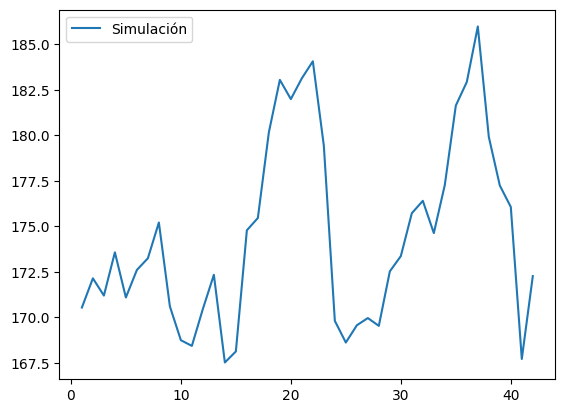

In [72]:
plt.plot(time_index, price_predictions, label='Simulación')
plt.legend()
plt.show()


In [73]:
# generar multiples simulaciones
n_simulations = 10000
predictions = []
for i in range(n_simulations):
    price_predictions = np.zeros(time_points)
    initial_price = train_set[-1]
    price_predictions[0] = initial_price
    epsilon = np.random.normal(0, 1, time_points)
    for j in range(time_points - 1):
        price_predictions[j + 1] = price_predictions[j] * np.exp((mu - 0.5 * sigma ** 2) * time_delta + sigma * np.sqrt(time_delta) * epsilon[j])
    predictions.append(price_predictions)
predictions


[array([170.5453186 , 168.49105475, 170.45850868, 170.90512632,
        169.08043783, 167.15955198, 166.69592197, 165.24617418,
        161.81420602, 163.47713977, 160.31210773, 154.30184526,
        151.54500597, 152.26689498, 153.24946545, 154.3995896 ,
        153.49676739, 152.7987237 , 154.5805727 , 153.77849153,
        153.55923144, 154.23621962, 147.98349362, 149.61032706,
        148.0067527 , 145.11427023, 145.94784467, 144.31220452,
        147.05045448, 147.58256483, 147.08144054, 144.70629986,
        148.81927375, 149.66944513, 145.51271844, 144.69917409,
        143.51097586, 143.29043967, 140.96300237, 138.25711507,
        139.08040505, 141.24761995]),
 array([170.5453186 , 169.54680008, 170.79187239, 169.49351072,
        171.88609392, 173.15503768, 180.27368527, 180.78233757,
        181.46606819, 180.46401237, 182.40534714, 187.9872849 ,
        190.18799086, 193.37406369, 186.89010156, 182.51403296,
        181.93610136, 183.0176022 , 183.76540931, 183.15161201,
  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


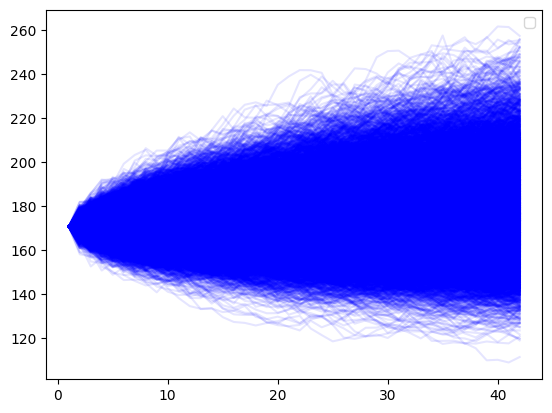

In [74]:
for prediction in predictions:
    plt.plot(time_index, prediction, color='b', alpha=0.1)
plt.legend()
plt.show()

In [75]:
prediction_max = [np.array(daily_prediction).max() for daily_prediction in zip(*predictions)]
prediction_min = [np.array(daily_prediction).min() for daily_prediction in zip(*predictions)]
prediction_average = 0.5 * (np.array(prediction_max) + 0.5 *  np.array(prediction_min))
prediction_average

array([127.90898895, 130.43859705, 131.1451237 , 133.65031588,
       133.79142812, 136.13475232, 138.05190625, 139.07319959,
       137.75727025, 137.81771058, 140.22597144, 140.32738393,
       138.93906177, 140.56036878, 142.7504129 , 143.94692829,
       144.68694031, 144.93931465, 145.61158191, 148.96252469,
       150.65753738, 151.69438897, 151.8918256 , 150.55196493,
       148.03550937, 147.97605641, 151.14630721, 151.25528161,
       154.01544788, 155.16142726, 155.97718278, 154.19397987,
       154.37192415, 156.1487999 , 158.03653978, 156.27137842,
       157.62734744, 155.57553868, 155.8408302 , 158.27811311,
       157.84618791, 156.44990407])

In [76]:
final_dataframe = pd.DataFrame({'Date': test_set.index, 'Real': test_set.values, 'Simulated': prediction_average})
final_dataframe

,Date,Real,Simulated
0,2023-10-31,170.545319,127.908989
1,2023-11-01,173.741104,130.438597
2,2023-11-02,177.336380,131.145124
3,2023-11-03,176.417572,133.650316
4,2023-11-06,178.994186,133.791428
5,2023-11-07,181.580780,136.134752
6,2023-11-08,182.649368,138.051906
7,2023-11-09,182.169998,139.073200
8,2023-11-10,186.399994,137.757270
9,2023-11-13,184.800003,137.817711


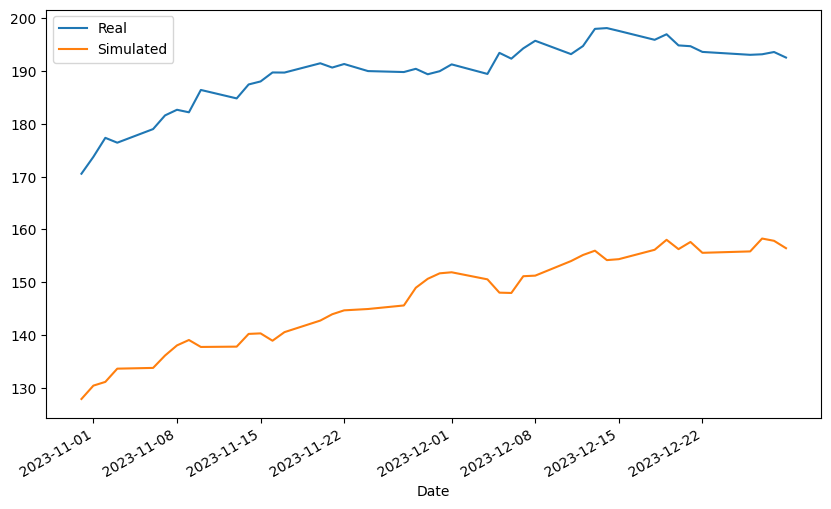

In [77]:
final_dataframe.plot(x='Date', y=['Real', 'Simulated'], figsize=(10, 6))
plt.show()


In [78]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(final_dataframe['Real'], final_dataframe['Simulated'])


22.579075619401912

In [79]:
def mean_absolute_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred))

mean_absolute_error(final_dataframe['Real'], final_dataframe['Simulated'])

42.68598712981235